<a href="https://colab.research.google.com/github/piyush1856/hypothesis-testing-scipy/blob/main/adv_hypo_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [52]:
!wget --no-check-certificate https://drive.google.com/uc?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0 -O two_way_anova.csv

--2024-09-03 08:24:16--  https://drive.google.com/uc?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0
Resolving drive.google.com (drive.google.com)... 74.125.197.101, 74.125.197.100, 74.125.197.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.197.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0 [following]
--2024-09-03 08:24:17--  https://drive.usercontent.google.com/download?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.99.132, 2607:f8b0:400e:c0c::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.99.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1541 (1.5K) [application/octet-stream]
Saving to: ‘two_way_anova.csv’

two_way_anova.csv   100%[===================>]   1.50K  --.-KB/s    in 0s      

2024-09-03 08:24:19 (71.7 MB/s)

In [53]:
df=pd.read_csv('/content/two_way_anova.csv')

In [54]:
from scipy.stats import levene #Test Variance

In [55]:
df['Flavour'].unique()

array(['Orange', 'Lemon', 'Cola'], dtype=object)

In [56]:
df['Location'].unique()

array(['West', 'East', 'North', 'South'], dtype=object)

In [57]:
pip install pingouin

In [58]:
import pingouin as pg

In [59]:
model = pg.anova(dv='Sales', between=['Location', 'Flavour'], data=df, ss_type=2)

# Display the results
print(round(model,4))

               Source           SS    DF         MS       F   p-unc     np2
0            Location    2059.2739   3.0   686.4246  0.3905  0.7601  0.0131
1             Flavour    6919.5590   2.0  3459.7795  1.9685  0.1458  0.0428
2  Location * Flavour   11802.2578   6.0  1967.0430  1.1192  0.3578  0.0709
3            Residual  154669.0163  88.0  1757.6025     NaN     NaN     NaN


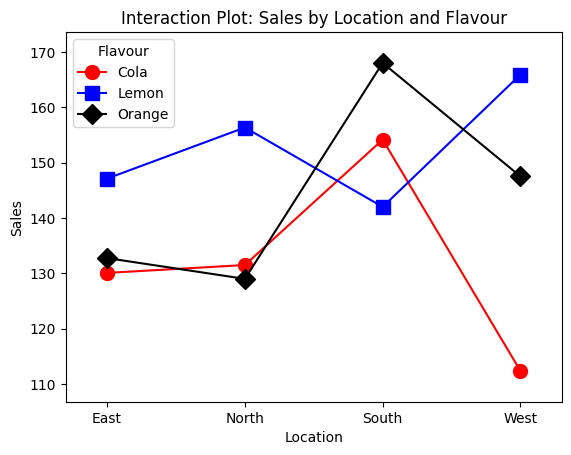

In [60]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(df.Location, df.Flavour, df.Sales, colors=['red','blue', 'black'], markers=['o', 's', 'D'], ms=10)

# Add axis labels and a title
plt.xlabel("Location")
plt.ylabel("Sales")
plt.title("Interaction Plot: Sales by Location and Flavour")

# Show the plot
plt.show()

In [61]:
#KS Test

In [62]:
#H0 : Dist(X) = Dist(Y)
#Ha : Dist(X) != Dist(Y)

#Kolmogorov distribution

In [63]:
# recovery times of patients who took medicine-1
r1 = [8.82420842, 7.47774471, 7.55712098, 7.98131439, 6.82771606,
       7.48566433, 9.15385732, 5.84040502, 8.26124313, 8.4728876 ,
       6.82582186, 7.00490974, 8.43423058, 6.72099932, 6.97495982,
       5.93748053, 5.40707847, 6.16385557, 6.71421056, 4.42396183,
       6.87285228, 8.00313581, 6.69035041, 7.83622942, 8.70984957,
       5.56284584, 9.08093437, 4.98165193, 7.67769408, 6.04738478,
       7.64921582, 7.31051639, 6.74463303, 7.27356973, 8.16787232,
       6.90990965, 7.06439167, 6.62921957, 6.08283539, 6.2458137 ,
       8.65173634, 5.76080646, 6.20573219, 8.91561004, 6.22560201,
       5.67542104, 6.97412435, 8.31354697, 8.14172701, 8.26099345,
       7.87612791, 6.24835109, 9.95324783, 6.59504627, 6.17365145,
       6.05676895, 7.23030223, 7.71311809, 7.37163804, 5.69798738,
       5.71056902, 7.94556876, 7.47234105, 6.85346234, 4.77892053,
       6.92631063, 6.10681151, 7.06277198, 7.18023164, 7.78285327,
       7.85500885, 6.54349161, 8.25949958, 6.44289198, 7.16705977,
       6.03517015, 7.61274786, 7.032845  , 6.78161745, 7.07917968,
       6.21549342, 5.34267439, 6.73039933, 7.70562561, 8.15117049,
       6.72564324, 6.68220904, 8.50359274, 7.52912703, 7.34572493,
       5.95734283, 6.58259396, 6.49394335, 8.68069592, 8.60547125,
       6.8905056 , 7.72575925, 6.84801609, 7.96999724, 7.10420915]

In [64]:
# recovery times of patietnts who took medicine-2
r2 = [ 9.56597358,  7.49291458,  8.73841824,  7.63523452,  4.12559277,
        7.3679259 ,  9.87873565,  6.14516559,  8.19923821,  7.30169992,
       10.24606417,  6.83814477,  7.01611267,  6.15716049,  8.29590714,
       12.3333305 ,  8.22144016,  6.06830071,  3.75820649,  6.69220157,
       10.08721618,  9.70580422,  7.31050006, 11.40145721,  5.64818498,
        7.38914449,  8.43740074,  6.3451435 ,  7.05694361,  8.1997151 ,
        9.03059061,  7.76904679,  6.92375578,  5.78318543,  8.99027781,
        7.56186529,  5.27095372,  8.32896688, 11.52935757,  7.08119961,
        9.48825066,  9.14072759,  7.30357663,  8.62183754, 10.40999814,
        8.70096763,  7.04645384,  6.378799  , 10.5098363 ,  7.36078888,
        7.33403615,  8.07396248,  6.18309499,  7.24668404,  9.03430611,
        8.99016584,  6.78606416,  8.436418  ,  6.85877947, 10.10405772,
        6.74943076,  7.57812376,  7.12920671,  9.38065269,  9.57139966,
        6.4484012 ,  6.93877043,  9.22141667,  8.34815638,  7.73980671,
        7.17840767,  9.27913457,  6.49963224,  9.92287292,  7.63978639,
        9.53931977,  9.02602273,  6.79374185,  8.59715131,  8.37747338,
        8.78161815,  6.78716383,  8.28473394,  8.20283798, 12.50518811,
       10.19772574,  8.93758457,  8.9540311 ,  8.28927558,  6.28935098,
        7.69447559,  9.66777701, 10.33898342,  8.71199578,  5.12781581,
        9.70954569,  9.13685031,  7.28989718,  8.0868909 ,  7.42937556,
        7.31356749,  9.92345816,  8.60211814,  9.33228465,  8.14132658,
        6.17871495, 10.28358242,  7.31898597,  7.95085527,  6.20331719,
        9.19119762,  6.98600628,  7.05314883, 10.57921482,  6.83637574,
        7.86199283,  8.23350975,  5.87625665,  7.78945364,  8.83612492]

In [65]:
d1 = np.array(r1)
d2 = np.array(r2)
n1 = len(d1)
n2 = len(d2)
n1, n2

(100, 120)

In [66]:
from scipy import stats
statistic, p_value =  stats.kstest(d1, d2)
print("KS Statistic:", statistic)
print("P-value:", p_value)

KS Statistic: 0.3233333333333333
P-value: 1.516338798228849e-05


In [67]:
# Check if the p-value is greater than 0.01
if p_value > 0.01:
    print("The p-value is greater than 0.01,two samples have the same distribution.")
else:
    print("The p-value is less than or equal to 0.01, two samples have different distributions.")

The p-value is less than or equal to 0.01, two samples have different distributions.


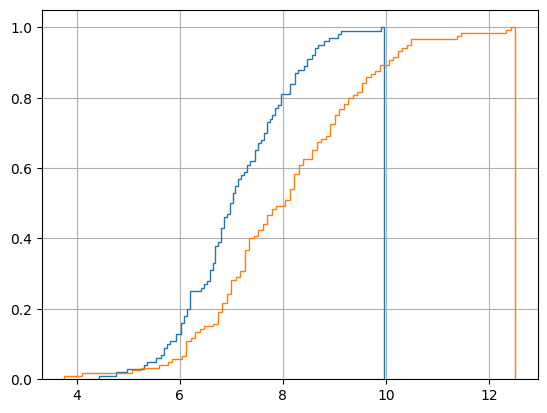

In [68]:
plt.grid()
a = plt.hist(d1, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
b = plt.hist(d2, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
plt.show()

## A/B Test

In [69]:
!gdown 1CS513bBqabMfrUhVcqm_nhlgrQheMNZ1

Downloading...
From: https://drive.google.com/uc?id=1CS513bBqabMfrUhVcqm_nhlgrQheMNZ1
To: /content/ab_test_data.csv
100% 884k/884k [00:00<00:00, 44.7MB/s]


In [70]:
ab_test_data = pd.read_csv("ab_test_data.csv")

ab_test_data.head(10)

,date,customer_id,premium,watch_time_hrs,customer_segmnt
0,2018-09-11,402,0,7.173618,control
1,2018-02-28,227,0,0.836170,control
2,2018-10-18,812,1,4.402078,treatment
3,2018-05-22,43,0,3.982454,control
4,2018-07-18,307,0,7.513302,control
5,2018-09-10,238,0,1.456961,control
6,2018-02-21,691,1,3.800375,treatment
7,2018-04-27,199,0,4.574446,control
8,2018-05-28,105,0,3.425942,control
9,2018-09-24,604,0,3.959896,treatment


In [71]:
sum((ab_test_data["premium"] == 0) & (ab_test_data["customer_segmnt"] == "control"))

8459

In [72]:
sum((ab_test_data["premium"] == 1) & (ab_test_data["customer_segmnt"] == "treatment"))

2012

In [73]:
sum((ab_test_data["premium"] == 1) & (ab_test_data["customer_segmnt"] == "control"))

1514

In [74]:
sum((ab_test_data["premium"] == 0) & (ab_test_data["customer_segmnt"] == "treatment"))

7975

In [75]:
ab_test_data['customer_segmnt'].value_counts()

,count
customer_segmnt,
treatment,9987
control,9973


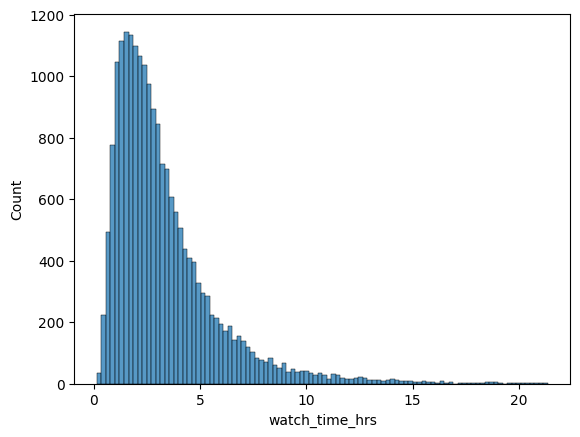

In [76]:
sns.histplot(ab_test_data['watch_time_hrs'], bins=100)
plt.show()

In [77]:
ab_test_data.groupby("customer_segmnt")["watch_time_hrs"].mean()

,watch_time_hrs
customer_segmnt,
control,3.609960
treatment,3.054294


In [78]:
ab_test_control_data = ab_test_data[ab_test_data["customer_segmnt"] == "control"]
ab_test_treatment_data = ab_test_data[ab_test_data["customer_segmnt"] == "treatment"]

In [79]:
ab_test_control_data["watch_time_hrs"].mean() - ab_test_treatment_data["watch_time_hrs"].mean()

0.555666548844524

In [80]:
from scipy.stats import ttest_ind
statistic, p_value = stats.ttest_ind(ab_test_control_data["watch_time_hrs"], ab_test_treatment_data["watch_time_hrs"])

# The two groups are independent
# So, we'll use the method for independent t-test

print("Test Statistic:", statistic)
print("P-value:", p_value)

Test Statistic: 15.96034913022092
P-value: 5.438408586231319e-57


## Practice

```
A researcher is interested in determining the effects of different dosages of a dietary supplement on the performance of both males and females on a physical endurance test.

The three different dosages of the medicine are low, medium, and high, and the genders are male and female.

Data: Dataset

Sample data:
```
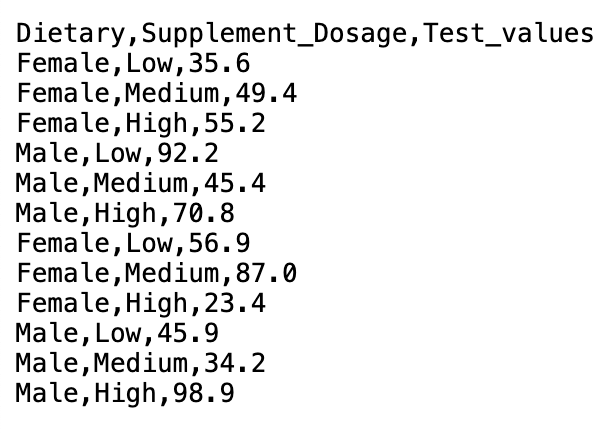
```
Conduct an appropriate hypothesis test to determine the interaction effects of the test at a 1% significance level.
```

In [81]:
# Null Hypothesis (H0):

# 1. There is no significant difference in average performance scores among different dietary supplement dosages.
# 2. There is no significant difference in average performance scores between male and female participants.
# 3. There is no significant interaction effect between dietary supplement dosage and gender on average performance scores.

# Alternative Hypothesis (H1):

# 1. There is a significant difference in average performance scores among different dietary supplement dosages.
# 2. There is a significant difference in average performance scores between male and female participants.
# 3. There is a significant interaction effect between dietary supplement dosage and gender on average performance scores. We can do this using the following code

df = pd.read_csv('dosages.csv')

model = pg.anova(dv='Test_values', between=['Dietary', 'Supplement_Dosage'], data=df, ss_type=2)

# Display the results

round(model, 4)

,Source,SS,DF,MS,F,p-unc,np2
0,Dietary,532.0008,1,532.0008,1.0752,0.3397,0.1520
1,Supplement_Dosage,130.8117,2,65.4058,0.1322,0.8787,0.0422
2,Dietary * Supplement_Dosage,2869.2017,2,1434.6008,2.8994,0.1315,0.4915
3,Residual,2968.7150,6,494.7858,NaN,NaN,NaN


```
A researcher wants to investigate the effects of two different fertilizers (‘A’ & ‘B’) and three watering frequencies (‘Low’, ‘Medium’, ‘High’) on the growth of tomato plants.

Is there a significant interaction between the fertilizer type and watering frequency on plant growth?

Dataset: Data

Sample data:
```
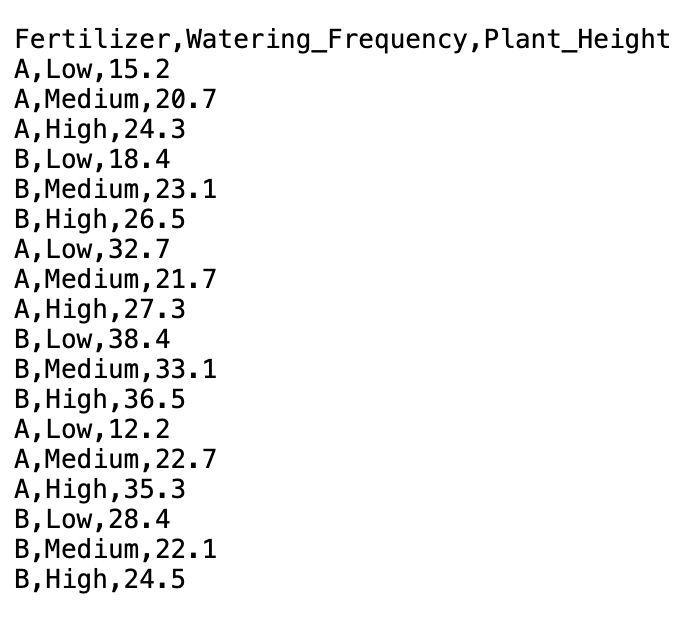
```
Conduct an appropriate hypothesis test to determine only the interaction effects of this research at a 5% significance level.
```

In [82]:
# H0 :
# 1. No significant effect of fertilizer on growth
# 2. No significant effect of watering on growth
# 3. No significant effect of interaction on growth

# Ha :
# 1. Significant effect of fertilizer on growth
# 2. Significant effect of watering on growth
# 3. Significant effect of interaction on growth

df = pd.read_csv('Fertilizer.csv')

model = pg.anova(dv='Plant_Height', between=['Watering_Frequency', 'Fertilizer'], data=df, ss_type=2)

# Display the results

round(model, 4)


,Source,SS,DF,MS,F,p-unc,np2
0,Watering_Frequency,100.6344,2,50.3172,0.9032,0.4311,0.1308
1,Fertilizer,84.0672,1,84.0672,1.5091,0.2428,0.1117
2,Watering_Frequency * Fertilizer,50.0344,2,25.0172,0.4491,0.6485,0.0696
3,Residual,668.5000,12,55.7083,NaN,NaN,NaN


In [83]:
# Fit the linear model
model = ols('Plant_Height ~ C(Fertilizer) * C(Watering_Frequency)', data=df).fit()

# Perform two-way ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                                         sum_sq    df         F    PR(>F)
C(Fertilizer)                         84.067222   1.0  1.509060  0.242831
C(Watering_Frequency)                100.634444   2.0  0.903226  0.431117
C(Fertilizer):C(Watering_Frequency)   50.034444   2.0  0.449075  0.648519
Residual                             668.500000  12.0       NaN       NaN


```
The Committee head of a national entrance exam wants to analyze if there are any differences in learning outcomes between students with different educational backgrounds (high school or college) and teaching methods (traditional or interactive) on test scores.
```

```
Conduct an appropriate hypothesis test to determine the main effects & interaction effects of the test at a 5% significance level.
```

In [84]:
df = pd.read_csv('Teaching_Method.csv')
df.head()

,Education,Teaching_Method,Test_Score
0,High School,Traditional,72
1,High School,Interactive,85
2,College,Traditional,70
3,College,Interactive,92
4,High School,Traditional,74


In [85]:
# H0 :
# 1. No significant diff on outcome among diff background
# 2. No significant diff on outcome among diff method
# 3. No significant diff on outcome among interaction of background and method

# Ha :
# 1. significant diff on outcome among diff background
# 2. significant diff on outcome among diff method
# 3. significant diff on outcome among interaction of background and method

# Fit the linear model
model = ols('Test_Score ~ C(Education) * C(Teaching_Method)', data=df).fit()

# Perform two-way ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                                 sum_sq    df         F    PR(>F)
C(Education)                       6.25   1.0  0.081477  0.780172
C(Teaching_Method)               552.25   1.0  7.199348  0.019920
C(Education):C(Teaching_Method)    4.00   1.0  0.052146  0.823216
Residual                         920.50  12.0       NaN       NaN


```
A data analyst is comparing the sales amounts (in dollars) for two different marketing strategies (A and B). The sales data for 20 days under each strategy is collected.


sales_strategy_A = [156, 153, 157, 154, 156, 159, 152, 156, 157, 154, 153, 157, 157,152, 155, 154, 151, 157, 155, 151]

sales_strategy_B = [135, 147, 126, 136, 158, 139, 163, 141, 156, 142, 130, 129, 161, 158, 117, 151, 121, 135, 123, 153]

Perform an appropriate test to assess if there is a significant difference in the sales distributions between Strategy A and Strategy B. Use a significance level of 0.05.
```

In [86]:
d1 = [156, 153, 157, 154, 156, 159, 152, 156, 157, 154, 153, 157, 157,152, 155, 154, 151, 157, 155, 151]

d2 = [135, 147, 126, 136, 158, 139, 163, 141, 156, 142, 130, 129, 161, 158, 117, 151, 121, 135, 123, 153]

statistic, p_value =  stats.kstest(d1, d2)
print(statistic, p_value)

0.65 0.0002704973445409677


```
A researcher is investigating the distribution of response times (in seconds) for two different versions of a mobile app, i.e. the time taken for a mobile app to respond to a user action, measured in seconds.


The goal is to determine if the response time distributions significantly differ between the two versions.

Data for 20 users for each app version is collected.

response_times_version_A = [1.2, 1.3, 1.1, 1.4, 1.2, 1.3, 1.0, 1.5, 1.2, 1.3, 1.2, 1.4, 1.1, 1.3, 1.2, 1.5, 1.3, 1.4, 1.2, 1.3]

response_times_version_B = [1.6, 1.2, 1.3, 1.4, 1.1, 1.3, 1.2, 1.5, 1.3, 1.4, 1.2, 1.3, 1.2, 1.4, 1.1, 1.3, 1.5, 1.2, 1.3, 1.4]
Choose the appropriate test for the given scenario
```

In [87]:
d1 = [1.2, 1.3, 1.1, 1.4, 1.2, 1.3, 1.0, 1.5, 1.2, 1.3, 1.2, 1.4, 1.1, 1.3, 1.2, 1.5, 1.3, 1.4, 1.2, 1.3]
d2 = [1.6, 1.2, 1.3, 1.4, 1.1, 1.3, 1.2, 1.5, 1.3, 1.4, 1.2, 1.3, 1.2, 1.4, 1.1, 1.3, 1.5, 1.2, 1.3, 1.4]

statistic, p_value =  stats.kstest(d1, d2)
print(statistic, p_value)

0.1 0.9999923931635496


```
An online shopping platform is testing two different delivery methods to improve the delivery times for their customers.

The data below represents the delivery times (in hours) for a sample of orders using Method A and Method B.

delivery_method_A = [2.5, 3.2, 2.8, 3.5, 3.0, 2.7, 2.9, 3.1, 2.6, 3.3]

delivery_method_B = [3.8, 3.2, 3.5, 3.1, 3.9, 3.0, 3.3, 3.6, 3.4, 3.7]
Using an appropriate test, determine if there is a significant difference in the delivery time distributions between Method A and Method B. Use a significance level of 0.05.
```

In [88]:
delivery_method_A = [2.5, 3.2, 2.8, 3.5, 3.0, 2.7, 2.9, 3.1, 2.6, 3.3]
delivery_method_B = [3.8, 3.2, 3.5, 3.1, 3.9, 3.0, 3.3, 3.6, 3.4, 3.7]

statistic, p_value =  stats.kstest(delivery_method_A, delivery_method_B)
print(statistic, p_value)

0.5 0.16782134274394334


```
A bank is launching two different approaches (A and B) to encourage customers to adopt its new mobile banking app. The bank randomly assigns a group of customers to each approach and monitors their adoption rates over a month.

Data:

Group A (Approach A): [38, 40, 42, 37, 39, 41, 36, 35, 43, 38]  
Group B (Approach B): [48, 45, 46, 43, 50, 44, 49, 47, 42, 46]
Note: Assume both Group A & Group B follow the normal distribution.
Objective:

Assess whether the new incentive program in Approach B leads to a statistically significant improvement in the average adoption rates compared to Approach A.

Choose a suitable statistical test.
```

In [89]:
# Null Hypothesis (H0): μA ≥ μB (There is no significant improvement in the adoption rates for Approach B compared to Approach A).
# Alternative Hypothesis (H1): μA < μB (There is a significant improvement in the adoption rates for Approach B compared to Approach A).

# Data
group_A = [38, 40, 42, 37, 39, 41, 36, 35, 43, 38]
group_B = [48, 45, 46, 43, 50, 44, 49, 47, 42, 46]

# Two-sample t-test
t_statistic, p_value = stats.ttest_ind(group_A, group_B, alternative = 'less')

# Print results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret results
alpha = 0.05

if p_value < alpha:
   print("Reject the null hypothesis. There is a significant improvement in the adoption rates for Approach B compared to Approach A")
else:
   print("Fail to reject the null hypothesis. There is no significant improvement in the adoption rates for Approach B compared to Approach A")

T-statistic: -6.125851335983492
P-value: 4.359142475666563e-06
Reject the null hypothesis. There is a significant improvement in the adoption rates for Approach B compared to Approach A


```
Suppose you conducted an experiment to investigate the impact of two different advertising strategies (A and B) on the click-through rates of a website.

After running the experiment, you found that the click-through count for Strategy A was 150, and for Strategy B, it was 200.

Perform a hypothesis test to determine if the difference in click-through rates between Strategy A and Strategy B is statistically significant. Use a significance level of 0.05. Assume 1000 users were exposed to each strategy.
```

In [90]:
# Number of users exposed to each strategy
n_A = n_B = 1000

# Null Hypothesis (H0): There is no difference in the click-through rates between advertising strategies A and B.
# In other words, the population proportions of clicks for both strategies are equal.
# Alternative Hypothesis (H1): There is a significant difference in the click-through rates between advertising strategies A and B.
# In other words, the population proportions of clicks for both strategies are not equal.


# Number of users who clicked through for each strategy
clicks_A = 150
clicks_B = 200

# Proportions for each strategy
prop_A = clicks_A / n_A
prop_B = clicks_B / n_B

# Perform two-sample proportion z-test
z_stat, p_value = sm.stats.proportions_ztest([clicks_A, clicks_B], [n_A, n_B], alternative='two-sided')

# Print the results
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
   print("Reject the null hypothesis. There is a significant difference in click-through rates between Strategy A and Strategy B.")
else:
   print("Fail to reject the null hypothesis. There is no significant difference in click-through rates between Strategy A and Strategy B.")

Z-statistic: -2.9424494316825
P-value: 0.0032562696284120576
Reject the null hypothesis. There is a significant difference in click-through rates between Strategy A and Strategy B.


```
A coffee shop wants to understand the relationship between the age group ('20-30','31-40', '41-50') and their preferred coffee type (Light Roast, Medium Roast, Dark Roast) based on data collected from a local Coffee Barista.

Do age groups and coffee types interact to influence the number of orders?

Conduct an appropriate hypothesis test to determine the interaction effects of the relationship at a 5% significance level.
```

In [92]:
df = pd.read_csv('coffee.csv')
df.head()

,Age_Group,Coffee_Type,Number_of_Orders
0,20-30,Light Roast,45
1,20-30,Medium Roast,60
2,20-30,Dark Roast,30
3,31-40,Light Roast,35
4,31-40,Medium Roast,40


In [93]:
model = pg.anova(dv='Number_of_Orders', between=['Age_Group', 'Coffee_Type'], data=df, ss_type=2)

# Display the results

round(model, 4)

,Source,SS,DF,MS,F,p-unc,np2
0,Age_Group,686.7778,2,343.3889,5.1040,0.0330,0.5314
1,Coffee_Type,143.4444,2,71.7222,1.0661,0.3841,0.1915
2,Age_Group * Coffee_Type,493.8889,4,123.4722,1.8353,0.2063,0.4492
3,Residual,605.5000,9,67.2778,NaN,NaN,NaN


```
A software tester investigates two different bug-fixing approaches (Fix A and Fix B) for their effectiveness in resolving errors in a software application. They track the bug resolution times (in hours) for a sample of bugs addressed with each approach:

fix_a_times = [2.5, 3.8, 2.3, 4.1, 3.0, 2.7, 3.5, 4.0, 2.8, 3.3]
fix_b_times = [0.8, 1.6, 1.1, 2.4, 1.3, 0.9, 1.7, 2.1, 1.0, 1.5]
Use an appropriate test, to determine if the two bug-fixing approaches significantly differ in their resolution time distributions. Use a significance level of 0.01.
```

In [94]:
fix_a_times = [2.5, 3.8, 2.3, 4.1, 3.0, 2.7, 3.5, 4.0, 2.8, 3.3]
fix_b_times = [0.8, 1.6, 1.1, 2.4, 1.3, 0.9, 1.7, 2.1, 1.0, 1.5]

statistic, p_value =  stats.kstest(fix_a_times, fix_b_times)
print(statistic, p_value)

0.9 0.00021650176448938054


```
A manager is evaluating the effects of two different work environments (office and remote) and three different management styles (directive, collaborative, autonomous) on employee productivity levels.

Is there a significant interaction effect between the work conditions and the management style on the average employee productivity?

Conduct an appropriate hypothesis test at a 5% significance level to determine the effects of the test.

Data:

Work_Condition = ['Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office','Remote', 'Remote', 'Remote', 'Remote', 'Remote', 'Remote','Remote', 'Remote', 'Remote', 'Remote', 'Remote', 'Remote']

Management_Style = ['Directive', 'Autonomous', 'Collaborative', 'Collaborative', 'Directive', 'Directive', 'Autonomous', 'Autonomous', 'Directive', 'Autonomous', 'Autonomous', 'Autonomous', 'Collaborative','Collaborative', 'Collaborative', 'Autonomous', 'Collaborative','Collaborative', 'Directive', 'Autonomous', 'Directive','Directive', 'Directive', 'Collaborative']

Productivity_Score = [79, 75, 93, 68, 77, 71, 91, 83, 86, 92, 66, 74, 77, 94, 89, 85, 70, 92, 92, 76, 76, 84, 94, 94]
```

In [96]:
Work_Condition = ['Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office','Remote', 'Remote', 'Remote', 'Remote', 'Remote', 'Remote','Remote', 'Remote', 'Remote', 'Remote', 'Remote', 'Remote']

Management_Style = ['Directive', 'Autonomous', 'Collaborative', 'Collaborative', 'Directive', 'Directive', 'Autonomous', 'Autonomous', 'Directive', 'Autonomous', 'Autonomous', 'Autonomous', 'Collaborative','Collaborative', 'Collaborative', 'Autonomous', 'Collaborative','Collaborative', 'Directive', 'Autonomous', 'Directive','Directive', 'Directive', 'Collaborative']

Productivity_Score = [79, 75, 93, 68, 77, 71, 91, 83, 86, 92, 66, 74, 77, 94, 89, 85, 70, 92, 92, 76, 76, 84, 94, 94]

df = pd.DataFrame({
 "Work_Condition": ['Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office','Remote', 'Remote', 'Remote', 'Remote', 'Remote', 'Remote','Remote', 'Remote', 'Remote', 'Remote', 'Remote', 'Remote'],
 "Management_Style":['Directive', 'Autonomous', 'Collaborative', 'Collaborative', 'Directive', 'Directive', 'Autonomous', 'Autonomous', 'Directive', 'Autonomous', 'Autonomous', 'Autonomous', 'Collaborative','Collaborative', 'Collaborative', 'Autonomous', 'Collaborative','Collaborative', 'Directive', 'Autonomous', 'Directive','Directive', 'Directive', 'Collaborative'],
 "Productivity_Score":[79, 75, 93, 68, 77, 71, 91, 83, 86, 92, 66, 74, 77, 94, 89, 85, 70, 92, 92, 76, 76, 84, 94, 94]})

model = pg.anova(dv='Productivity_Score', between=['Work_Condition', 'Management_Style'], data=df, ss_type=2)

# Display the results

round(model, 4)

,Source,SS,DF,MS,F,p-unc,np2
0,Work_Condition,127.5125,1.0,127.5125,1.3410,0.2620,0.0693
1,Management_Style,11.4292,2.0,5.7146,0.0601,0.9419,0.0066
2,Work_Condition * Management_Style,54.1542,2.0,27.0771,0.2848,0.7555,0.0307
3,Residual,1711.5833,18.0,95.0880,NaN,NaN,NaN
